<a href="https://colab.research.google.com/github/MariePocarovska/MariePocarovska/blob/main/tutorials_vsai_doplnovacka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning tutorial 🤖
### Task: Heart failure classification

F. Plesinger,
fplesinger@isibrno.cz

E. Vargova,
xvargo02@isibrno.cz

M. Kolajova,
kolajova@isibrno.cz



ISI of the CAS

 ## Predikce srdečního selhání 🫀

Srdce je důmyslně uspořádaná pumpa, jejímž hlavním úkolem je udržovat oběh krve tak, aby bylo zajištěno zásobování všech orgánů živinami a kyslíkem. Při vzniku srdečního selhání je základní funkce  narušena, nedostatečné prokrvení se projevuje nejprve při zátěži. Srdeční selhání může vzniknout náhle (akutní selhání) nebo se stav rozvíjí pozvolna (chronické selhání).  Jedná se o velmi rozšířené onemocnění po celém světě spojené s nárůstem mortality a opakovaným hospitalizacím.

Našim dnešním úkolem bude predikce srdečního selhání. Budeme pracovat s datasetem, který obsahuje různé informace od 297 pacientů.

**Popis datasetu:**

id: ID pacienta

age: věk pacienta

Chest_pain: bolset na hrudi

- typical angina
- atypical angina
- non-anginal
- asymptomatic

Sex_male: pohlaví pacienta (žena - 0, muž - 1)

SBP_mmhg: systolický krevní tlak

Cholesterol_mgdl: cholesterol

Sugar_GE120_mgdl: Hladina cukru v krvi nalačno > 120 mgdl (potom 1)

EX_BPM_Max: maximální tepová frekvence při aktivitě

Ex_Angina_Pectoris: boles na hrudi při zvýšené zátěži (aktivitě)

Ex_ST_dep: ST deprese při aktivitě

NUM_Vessels: počet hlavních cév, které byly viditelné pomocí fluoroskopie


Vaše verze Pythonu

In [6]:
!python -V

Python 3.10.12


##1. Stažení dat ⬇ a import potřebných knihoven 📚

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Stažení dat
!gdown 127omi0WGjB6D4RFYJEyRe3TI965cscHY

Downloading...
From: https://drive.google.com/uc?id=127omi0WGjB6D4RFYJEyRe3TI965cscHY
To: /content/HeartFailure.csv
100% 15.0k/15.0k [00:00<00:00, 23.0MB/s]


###Načtení dat do <pandas.DataFrame> objektu (tabulková data)

In [4]:
# Načtení dat (.csv) do dataframe (df)
path_to_data = '/content/HeartFailure.csv'
df = pd.read_csv(path_to_data)

# Vypíše názvy sloupců v df
print("Columns:",df.columns)
# Vypíše velikost df (počet řádků a sloupců)
print("Shape:",df.shape)

Columns: Index(['Unnamed: 0', 'age', 'Chest_pain', 'Sex_male', 'SBP_mmHg',
       'Cholesterol_mdgl', 'Sugar_GE120_mgdl', 'Ex_BPM_Max',
       'Ex_Angina_Pectoris', 'Ex_ST_dep', 'Num_vessels', 'Is_Heart_Failure'],
      dtype='object')
Shape: (297, 12)


In [5]:
# Zobrazí prvních pět řádku df
df.head()

,Unnamed: 0,age,Chest_pain,Sex_male,SBP_mmHg,Cholesterol_mdgl,Sugar_GE120_mgdl,Ex_BPM_Max,Ex_Angina_Pectoris,Ex_ST_dep,Num_vessels,Is_Heart_Failure
0,0,69,typical angina,1,160,234,1,131,0,0.1,1.0,0
1,1,69,typical angina,0,140,239,0,151,0,1.8,2.0,0
2,2,66,typical angina,0,150,226,0,114,0,2.6,0.0,0
3,3,65,typical angina,1,138,282,1,174,0,1.4,NaN,1
4,4,64,typical angina,1,110,211,0,144,1,1.8,0.0,0


Metoda df.describe() poskytuje souhrnné statistiky číselných sloupců v DataFrame, včetně hodnot jako je průměr, směrodatná odchylka, minimum, maximum a kvartily, což pomáhá porozumět distribuci dat.

In [32]:
# Souhrnná statistika df
df.describe()

,Unnamed: 0,age,Sex_male,SBP_mmHg,Cholesterol_mdgl,Sugar_GE120_mgdl,Ex_BPM_Max,Ex_Angina_Pectoris,Ex_ST_dep,Num_vessels,Is_Heart_Failure
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,257.000000,297.000000
mean,148.000000,54.542088,0.676768,131.693603,247.350168,0.144781,149.599327,0.326599,1.055556,0.677043,0.461279
std,85.880731,9.049736,0.468500,17.762806,51.997583,0.352474,22.941562,0.469761,1.166123,0.952371,0.499340
min,0.000000,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,48.000000,0.000000,120.000000,211.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000
50%,148.000000,56.000000,1.000000,130.000000,243.000000,0.000000,153.000000,0.000000,0.800000,0.000000,0.000000
75%,222.000000,61.000000,1.000000,140.000000,276.000000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,296.000000,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## 2. Vizualizace dat a předzpracování dat 🔍

Nejdříve si zjistíme, kolik lidí v našem datasetu má srdeční selhání.

In [6]:
# Počet 0 (bez SS) a počet jedniček (má SS)
hf = df["Is_Heart_Failure"]
pocet_nul = np.sum(df["Is_Heart_Failure"] == 0) # sloupeček, kde je TRUE tam, kde je nula, sum mi sečte všechny hodnoty TRUE
pocet_jednicek = np.sum(df["Is_Heart_Failure"]  == 1)

print("Počet lidí bez srdečního selhání:", pocet_nul)
print("Počet lidí se srdečním selháním:", pocet_jednicek)

Počet lidí bez srdečního selhání: 160
Počet lidí se srdečním selháním: 137


Teď si vykreslíme histogramy.

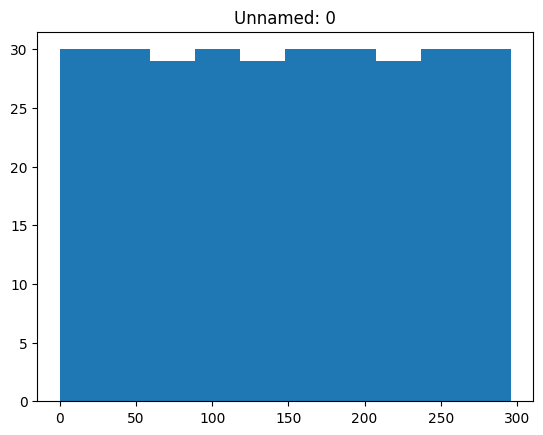

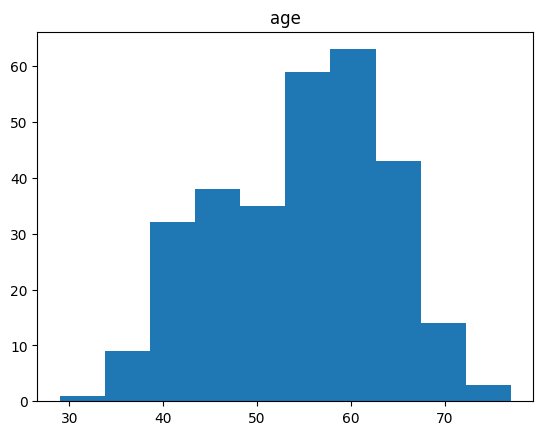

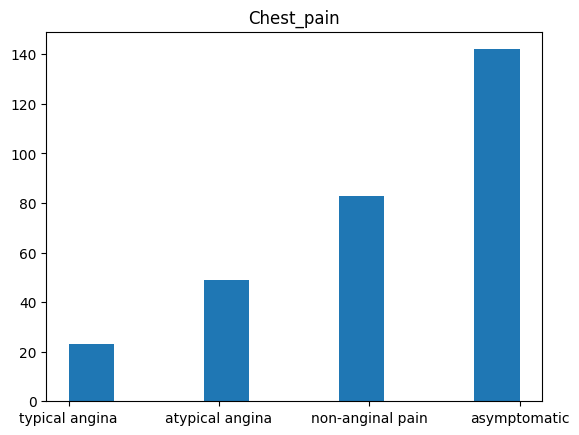

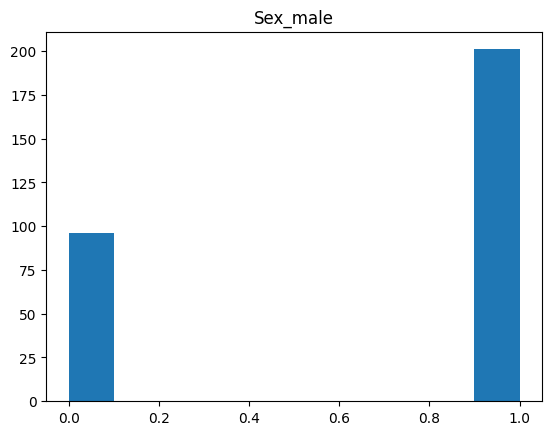

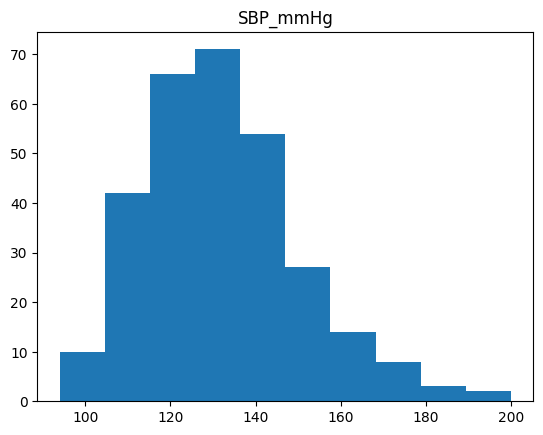

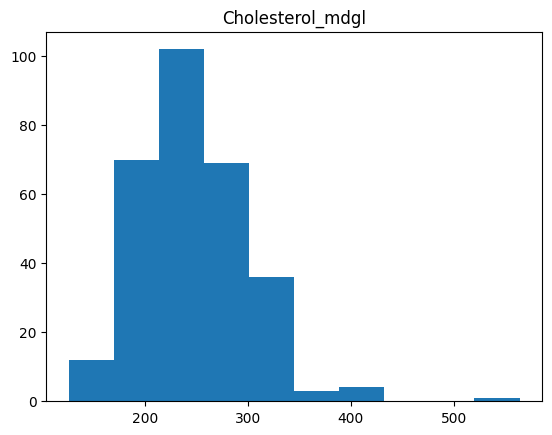

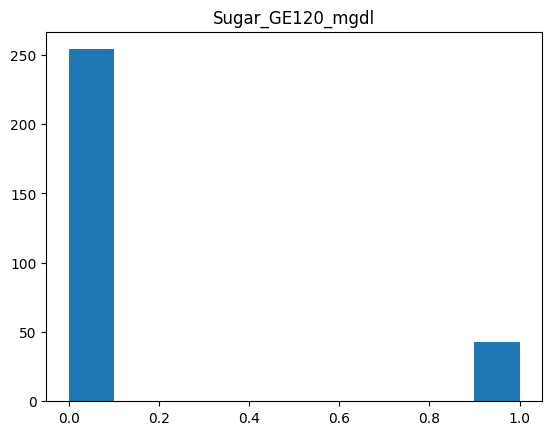

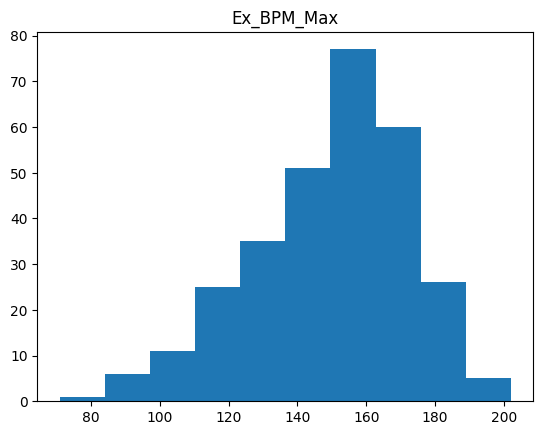

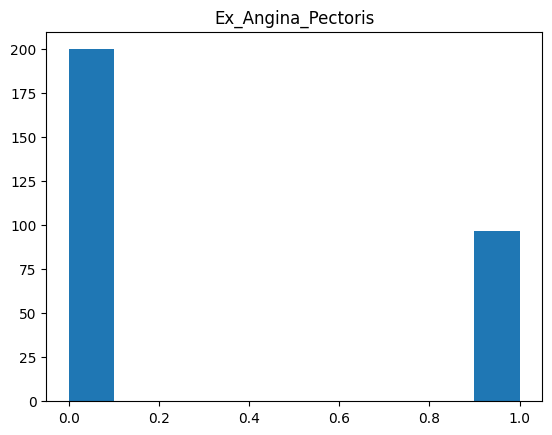

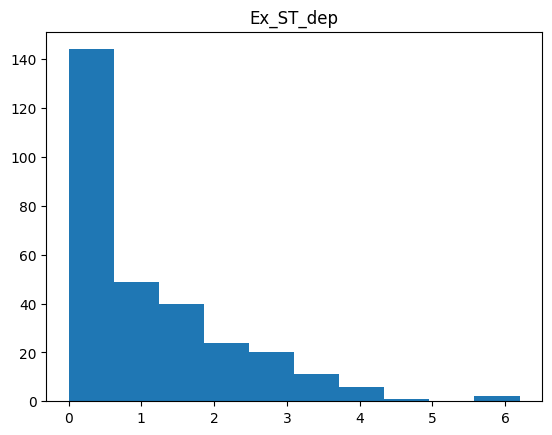

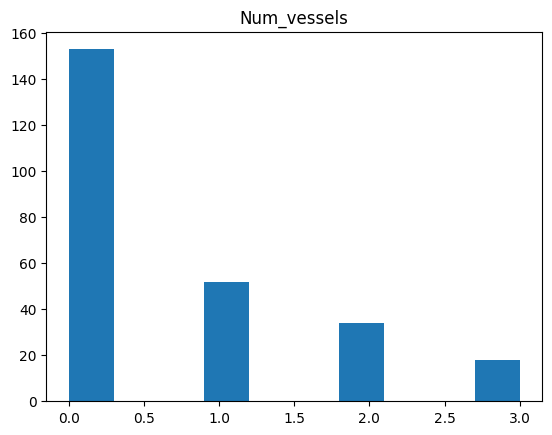

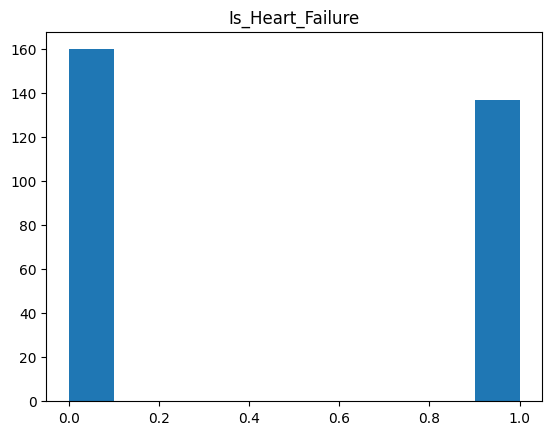

In [19]:
# Vykreslení histogramů pro všechny příznaky (sloupce)
for c in df.columns:
    plt.figure()
    plt.hist(df[c].values)
    plt.title(c)
    plt.savefig(c+"_histogram.svg")
    plt.show()

Nyní na základě histogramů vidíme, že je potřeba odstranit sloupec "Unnamed: 0" z našeho DataFramu. V podstatě se jedná o index a mohl by následně ovlivnit model.

Pro odstranění sloupce použijte drop().

In [7]:
# smazání prvního sloupce řádku (id)
df = df.drop(columns="Unnamed: 0")

# Vypsání sloupců v df
print("Columns:",df.columns)
# Vypsání velikosti df
print("Shape:",df.shape)

Columns: Index(['age', 'Chest_pain', 'Sex_male', 'SBP_mmHg', 'Cholesterol_mdgl',
       'Sugar_GE120_mgdl', 'Ex_BPM_Max', 'Ex_Angina_Pectoris', 'Ex_ST_dep',
       'Num_vessels', 'Is_Heart_Failure'],
      dtype='object')
Shape: (297, 11)


Teď si vykreslíme histogramy pro všechny příznaky vzhledem ke třídám.

age


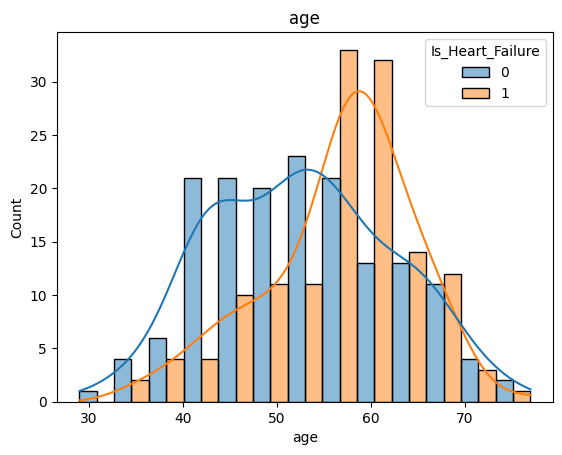

Chest_pain


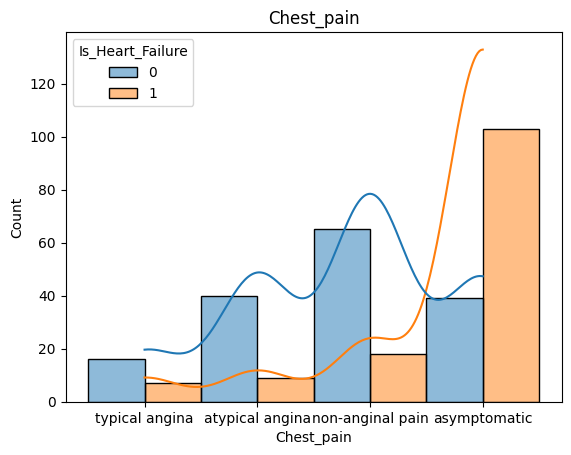

Sex_male


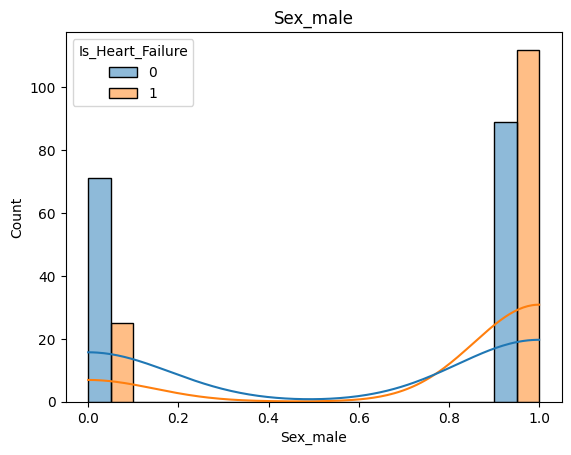

SBP_mmHg


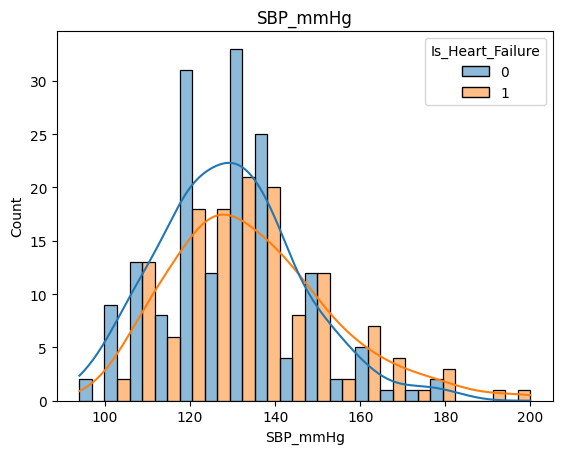

Cholesterol_mdgl


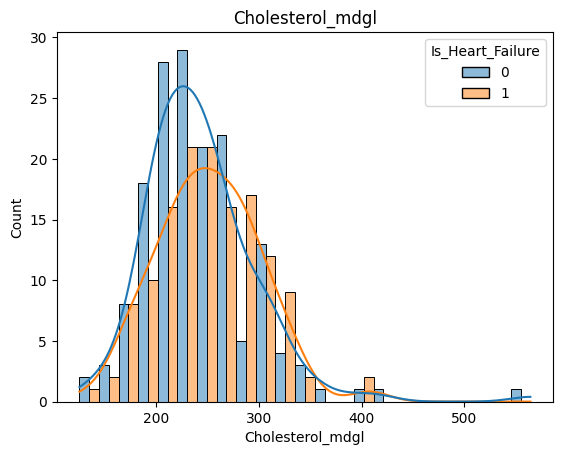

Sugar_GE120_mgdl


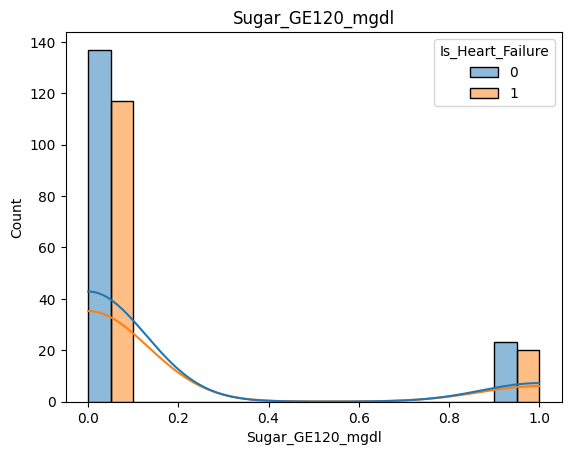

Ex_BPM_Max


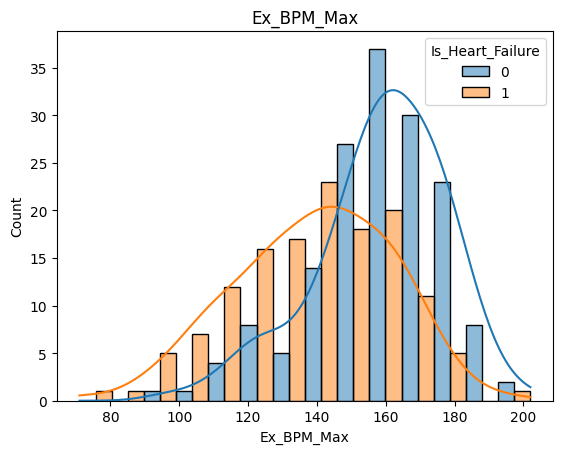

Ex_Angina_Pectoris


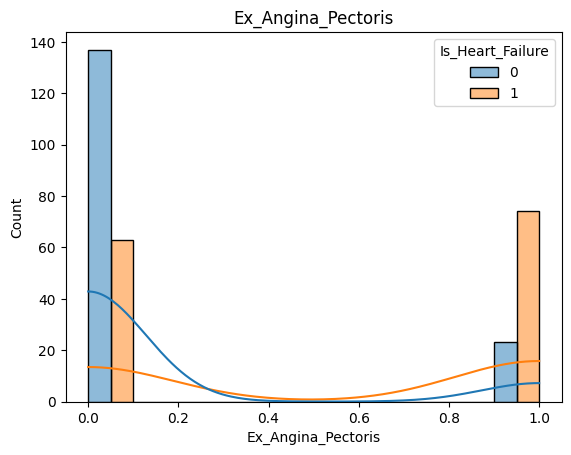

Ex_ST_dep


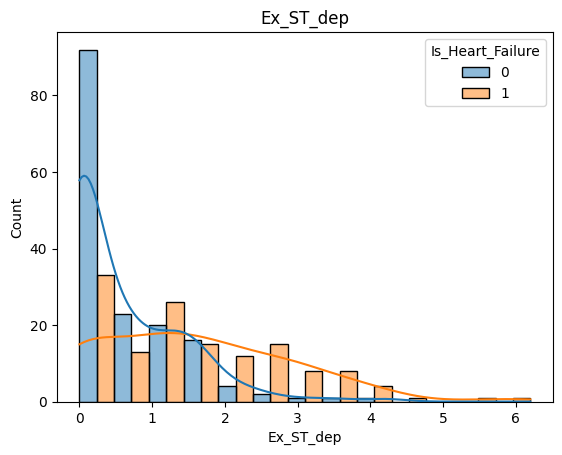

Num_vessels


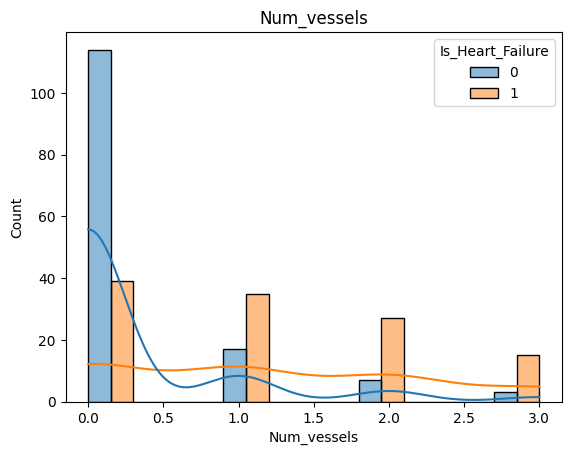

Is_Heart_Failure


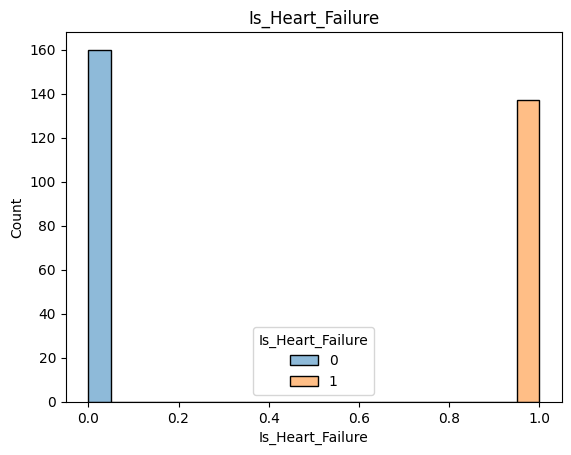

In [8]:
# Vykreslení histogramů pro všechny příznaky (sloupce) vzhledem ke třídám
for c in df.columns:
    print(c)
    plt.figure()
    sns.histplot(data=df, x=c,hue="Is_Heart_Failure", multiple = "dodge", kde = True) # hue - tím říkám, co používám k zabarvení
    plt.title(c)
    plt.show()

Dále můžeme na základě histogramů velice jednoduše určit, které proměnné jsou kateogrické a které numerické.

Columns: Index(['age', 'Chest_pain', 'Sex_male', 'SBP_mmHg', 'Cholesterol_mdgl',
       'Sugar_GE120_mgdl', 'Ex_BPM_Max', 'Ex_Angina_Pectoris', 'Ex_ST_dep',
       'Num_vessels', 'Is_Heart_Failure'],

In [9]:
# list obsahující názvy numerických proměnných
numerical_columns = ['age', 'SBP_mmHg', 'Cholesterol_mdgl', 'Ex_BPM_Max', 'Ex_ST_dep', 'Num_vessels']
# list obsahující názvy kategorických proměnných proměnných
categorical_columns = ['Chest_pain', 'Sex_male', 'Sugar_GE120_mgdl', 'Ex_Angina_Pectoris', 'Is_Heart_Failure']

Pairplot

<ipython-input-10-dc73fdcacf1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Is_Heart_Failure'] = df['Is_Heart_Failure'] # zase to barevně porovnávám z hlediska toho, zda byla nebo nebyla srdeční příhoda


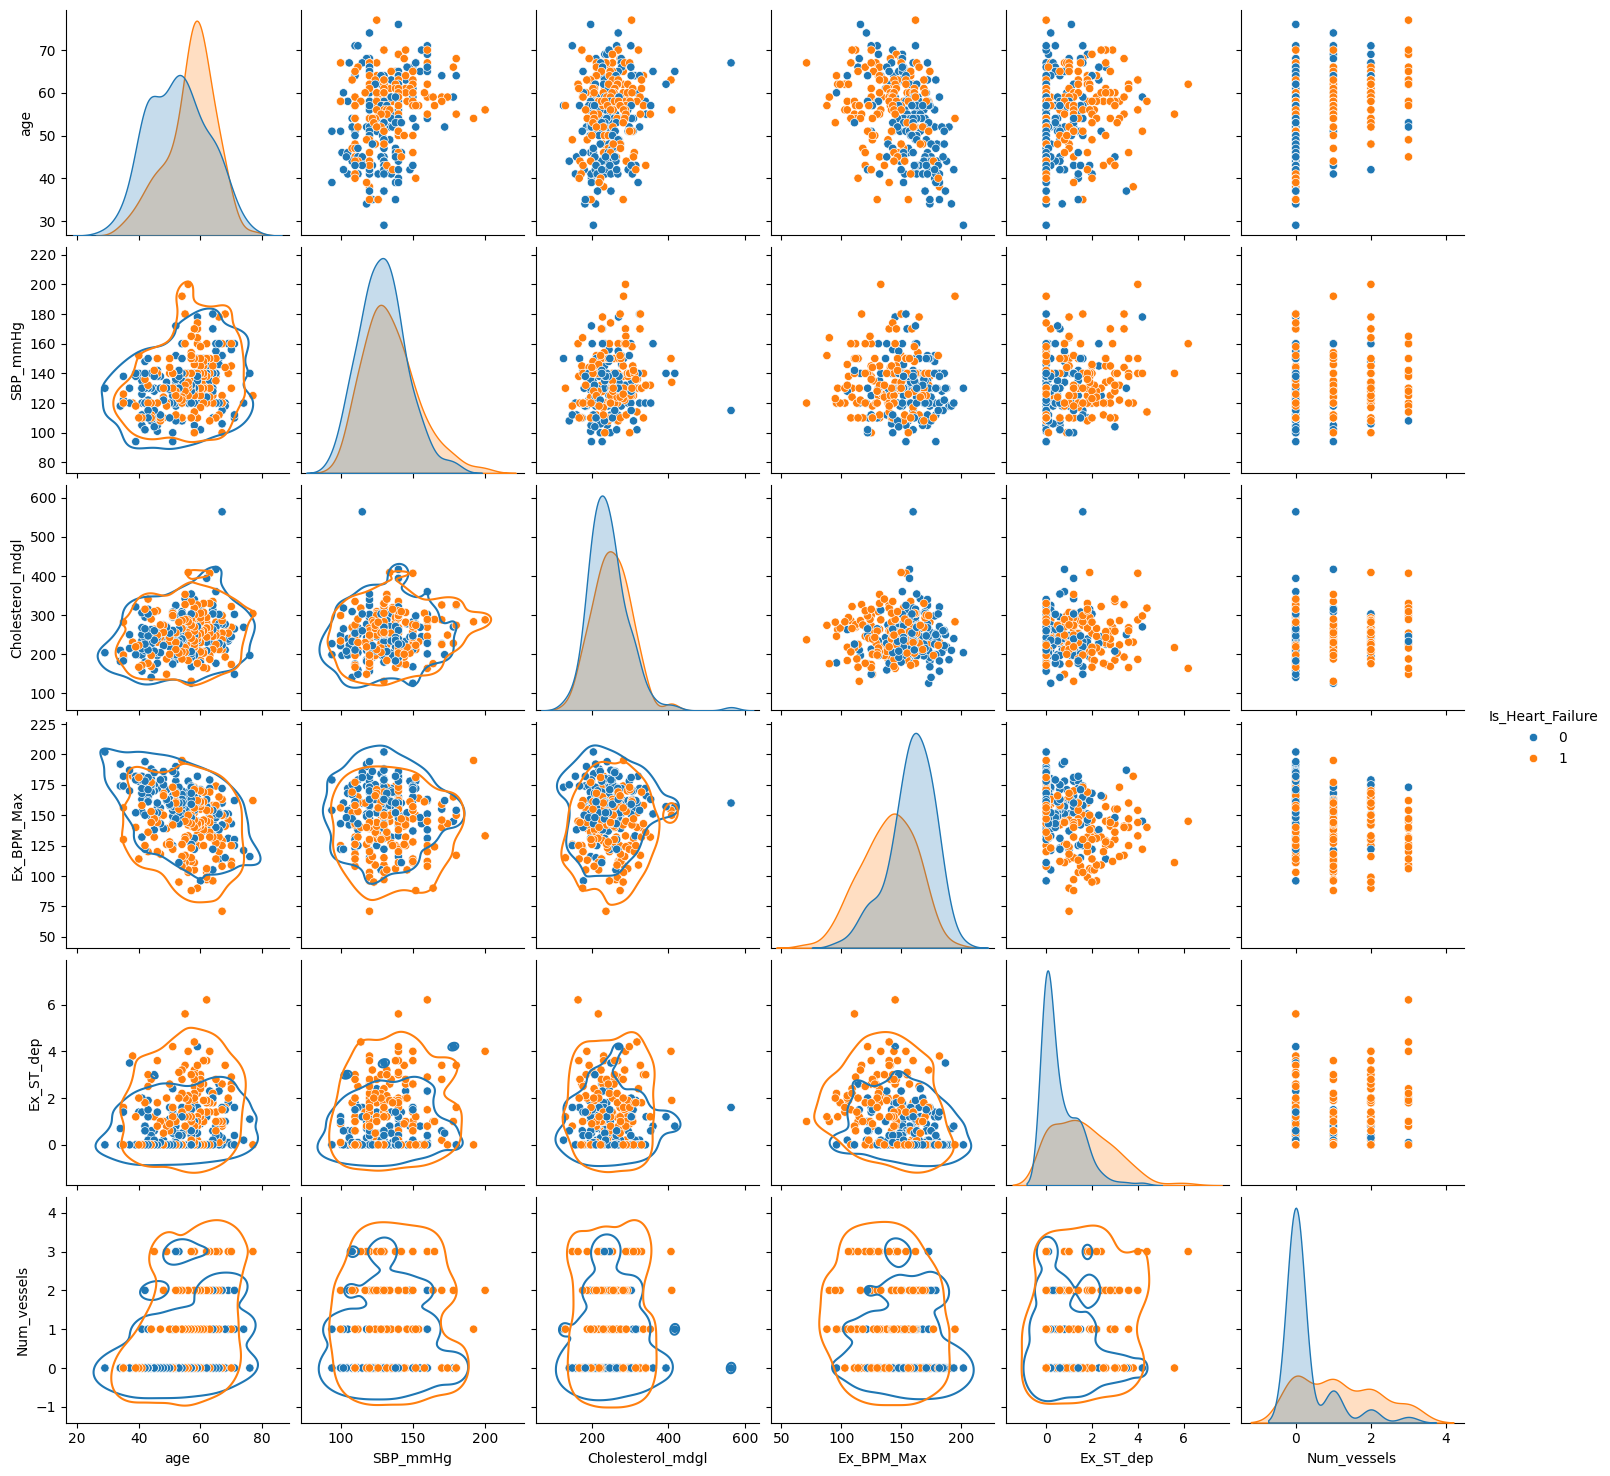

In [10]:
# Vytvoření dataframu, který obsahuje pouze numerické příznaky
df_num = df[numerical_columns ]
df_num['Is_Heart_Failure'] = df['Is_Heart_Failure'] # zase to barevně porovnávám z hlediska toho, zda byla nebo nebyla srdeční příhoda

# Pairplot
g = sns.pairplot(df_num, hue='Is_Heart_Failure')
g = g.map_lower(sns.kdeplot, levels=2, color=".2")


##Předzpracování dat 📊

Nyní je potřeba předzpracovat data tak, abychom je mohli použít jako vstup do různých modelů.

###One-hot encoding

One-hot encoding převádí každou kategorii na nový binární sloupec, kde je 1, pokud vzorek patří do dané kategorie, a 0, pokud nepatří.

Lze jej provést pomocí metody get_dummies() v knihovně Pandas, ale je třeba myslet na to, že se dimenziolita bude zvětšovat s počtem kategorií N.

In [11]:
# One-hot encoding
df= pd.get_dummies(df)
# Vypsání názvů sloupců v df
print("Columns:",df.columns)
# Vypsání velikosti df
print("Shape:",df.shape)

Columns: Index(['age', 'Sex_male', 'SBP_mmHg', 'Cholesterol_mdgl', 'Sugar_GE120_mgdl',
       'Ex_BPM_Max', 'Ex_Angina_Pectoris', 'Ex_ST_dep', 'Num_vessels',
       'Is_Heart_Failure', 'Chest_pain_asymptomatic',
       'Chest_pain_atypical angina', 'Chest_pain_non-anginal pain',
       'Chest_pain_typical angina'],
      dtype='object')
Shape: (297, 14)


###Nalezení chybějících dat


Nejdříve je potřeba zjistit, kolik je celkem chybějících hodnot v datasetu.
S využitím isnull() a sum() zjistětě počet chybějících hodnot pro každý sloupec (příznak).

In [12]:
missing_data = df.isnull().sum()
print("Počet chybějících hodnot ve sloupcích:")
print(missing_data)

Počet chybějících hodnot ve sloupcích:
age                             0
Sex_male                        0
SBP_mmHg                        0
Cholesterol_mdgl                0
Sugar_GE120_mgdl                0
Ex_BPM_Max                      0
Ex_Angina_Pectoris              0
Ex_ST_dep                       0
Num_vessels                    40
Is_Heart_Failure                0
Chest_pain_asymptomatic         0
Chest_pain_atypical angina      0
Chest_pain_non-anginal pain     0
Chest_pain_typical angina       0
dtype: int64


###Nahrazení chybějících hodnot

Chybějící hodnoty lze buď úplně odstranit (zmenšení datasetu), nebo nahradit.
V následující buňce nahraďte chybějící hodnoty mediánem s využitím SimpleImputer.

In [13]:
from sklearn.impute import SimpleImputer
# Nahrazení chybějících hodnot mediánem
imp = SimpleImputer(missing_values=np.nan, strategy = "median")
vals = imp.fit_transform(df)
# Vytvoření nového dataframu již s nahrazenými chybějícími hodnotami
di = pd.DataFrame(data=vals, columns=df.columns)

Ověřte, zda skutečně došlo k nahrazení chybějících hodnot.

In [61]:
print("Missing data:", di.isnull().sum())

Missing data: age                            0
Sex_male                       0
SBP_mmHg                       0
Cholesterol_mdgl               0
Sugar_GE120_mgdl               0
Ex_BPM_Max                     0
Ex_Angina_Pectoris             0
Ex_ST_dep                      0
Num_vessels                    0
Is_Heart_Failure               0
Chest_pain_asymptomatic        0
Chest_pain_atypical angina     0
Chest_pain_non-anginal pain    0
Chest_pain_typical angina      0
dtype: int64


###Rozdělení dat na trénovací a testovací sadu dat 📂

Jelikož v této úloze budeme používat supervised ML metody, je třeba mít k dispozici ke každému pacientovi (řádku) label, tedy informaci o tom, zda má/nemá srdeční selhání. Vytvořte sloupec y, který bude obsahovat labely. Nezapomeňte, že je třeba tento sloupec z dataframu také odstranit.

In [14]:
di.head(10)

,age,Sex_male,SBP_mmHg,Cholesterol_mdgl,Sugar_GE120_mgdl,Ex_BPM_Max,Ex_Angina_Pectoris,Ex_ST_dep,Num_vessels,Is_Heart_Failure,Chest_pain_asymptomatic,Chest_pain_atypical angina,Chest_pain_non-anginal pain,Chest_pain_typical angina
0,69.0,1.0,160.0,234.0,1.0,131.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,1.0
1,69.0,0.0,140.0,239.0,0.0,151.0,0.0,1.8,2.0,0.0,0.0,0.0,0.0,1.0
2,66.0,0.0,150.0,226.0,0.0,114.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,1.0
3,65.0,1.0,138.0,282.0,1.0,174.0,0.0,1.4,0.0,1.0,0.0,0.0,0.0,1.0
4,64.0,1.0,110.0,211.0,0.0,144.0,1.0,1.8,0.0,0.0,0.0,0.0,0.0,1.0
5,64.0,1.0,170.0,227.0,0.0,155.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0
6,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,1.0
7,61.0,1.0,134.0,234.0,0.0,145.0,0.0,2.6,2.0,1.0,0.0,0.0,0.0,1.0
8,60.0,0.0,150.0,240.0,0.0,171.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,1.0
9,59.0,1.0,178.0,270.0,0.0,145.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
# uložení labelů do proměnné y
y = di.Is_Heart_Failure.values
# odstranění labelů z dataframu di
print(y)
X = di.drop("Is_Heart_Failure", axis='columns')
# pokud to chápu dobře, tak jsem uložila IS_Heart_Failure do proměnné y, abych mohla rozdělit data

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1.]


V následující buňce rozdělte data na trénovací (60 %) a testovací (40 %) s využitím train_test_split a nastavte parametr random_state na 42.

In [26]:
from sklearn.model_selection import train_test_split
# Rozdělení datastu na trénovací (60 %) a testovací sadu (40 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [ ]:
Xhf = X_train[y_train==1]  # Data od pacientů, kteří mají HF (Is_Heart_Failure == 1)
Xnm = X_train[y_train==0]  # Data od pacientů, kteří nemají HF (Is_Heart_Failure == 0)


for c in df_num.columns:

    if 1==1:  # Podmínka pro provedení následující části kódu (splněna)
        if c=="Is_Heart_Failure":
            continue

        # Výběr hodnot ve sloupci pro skupiny s a bez srdečního selhání
        vlshf = Xhf[c].values
        vlsnm = Xnm[c].values

        # histogram pro daný příznak vzhledem ke třídám
        plt.figure(figsize=(12,6))
        plt.subplot(1,2,1)
        sns.histplot(data=di, x=c,hue="Is_Heart_Failure", multiple = "dodge")
        # boxplot pro daný příznak vzhledem ke třídám
        plt.subplot(1,2,2)
        sns.boxplot(data=di, y=c,x="Is_Heart_Failure",hue="Is_Heart_Failure")

        plt.suptitle(c)
        plt.show()

###Standardizace dat 📏
Velice důležitý krok pro většinu metod strojového učení (mimo tree-based metody). Standardizujte data za pomocí StandardScaler() a fit_transform().

In [ ]:
from sklearn.preprocessing import StandardScaler

# standardizace pouze numerických porměnných
features_train = X_train[numerical_columns]
features_test = X_test[numerical_columns]

# fit SrandardScaler on training data
scaler = StandardScaler()
scaler.fit(features_train.values)
# transfrom trainining and testing datasets
features_train = scaler.transform(features_train.values)
features_test = scaler.transform(features_test.values)

X_train_std = X_train.copy()
X_test_std = X_test.copy()

# substitute columns in X_train and X_test with standardized data
X_train_std[numerical_columns] = features_train
X_test_std[numerical_columns] = features_test

In [ ]:
X_train_std.describe()

In [ ]:
X_test_std.describe()

In [ ]:
# Vykreslení histogramu pro věk před a po standardizaci
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(X_test.age)
plt.title("Před standardizací")

plt.subplot(1, 2, 2)
plt.hist(X_test_std.age)
plt.title("Po standardizaci")

plt.suptitle("Porovnání parametru (věk) před a po standardizaci")
plt.show()

## 3. Trénování modelů 🚀

Pro trénování modelů budeme používat knihovnu sklearn.

###Logistická regrese 📈

Nejdříve si zkusíme natrénovat model logistické regrese a následně zjistíme jeho úspěšnost na trénovací i testovací sadě dat.

In [ ]:
from sklearn.linear_model import LogisticRegression
# inicializace modelu (defaultní parametry)
mlr = LogisticRegression(random_state=0)
# Trénování LR
mlr.fit(...)
# Predikce na testovacím datasetu
y_pred = mlr.predict(...)

In [ ]:
# Úspěšnost na testovacím datasetu
from sklearn.metrics import accuracy_score
acc = accuracy_score(...)
# Vypsání úspěšnosti na obou datasetech
print("- Train accuracy = %.3f"%mlr.score(X_train_std,y_train))
print("- Test accuracy = %.3f"%acc)

NameError: name 'accurac_score' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
# Matice záměn
cm = confusion_matrix(...)
# Vykreslení
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

Vykreslení ROC křivky

- Senzitivita: Míra, která vyjadřuje podíl správně klasifikovaných pozitivních případů ke všem skutečně pozitivním případům.
- Specificita: Míra, která vyjadřuje podíl správně klasifikovaných negativních případů ke všem skutečně negativním.

In [ ]:
from sklearn.metrics import auc, roc_curve

# Výstup modelu - pravděpodobnost, nikoliv konkrétní třída, potřebujme k vykreslení ROC křivky
y_pred_proba = mlr.predict_proba(X_test_std)

# Výstup modelu
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel("1-Specificita")
plt.ylabel("Senzitivita")
plt.title("AUC: " + str(round(auc,2)))
plt.show()

###Random Forest 🌲

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# inicializace modelu (defaultní parametry)
mrf = RandomForestClassifier(random_state=0)
# Trénování RF
mrf.fit(...)
# Predikce na testovacím datasetu
y_pred = mrf.predict(...)

In [ ]:
# Úspěšnost na testovacím datasetu
acc = accuracy_score(...)
# Vypsání úspěšnosti na obou datasetech
print("- Train accuracy = %.3f"%mrf.score(...))
print("- Test accuracy = %.3f"%acc)

In [ ]:
from sklearn.metrics import confusion_matrix
# Matice záměn
cm = confusion_matrix(..., ...)
# Vykreslení
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

Vykreslení ROC křivky

In [ ]:
from sklearn.metrics import auc, roc_curve

# Výstup modelu - pravděpodobnost, nikoliv konkrétní třída, potřebujme k vykreslení ROC křivky
y_pred_proba = mrf.predict_proba(X_test_std)

# Výstup modelu
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel("1-Specificita")
plt.ylabel("Senzitivita")
plt.title("AUC: " + str(round(auc,2)))
plt.show()

###Neural Network 🧠

In [ ]:
from sklearn.neural_network import MLPClassifier
# inicializace modelu
mnn = MLPClassifier(random_state=0, hidden_layer_sizes=(50), max_iter=1000)
# Trénování NN
mnn.fit(...)
# Predikce na testovacím datasetu
y_pred = mnn.predict(...)

In [ ]:
# Úspěšnost na testovacím datasetu
acc = accuracy_score(...)
# Vypsání úspěšnosti na obou datasetech
print("- Train accuracy = %.3f"%mnn.score(...))
print("- Test accuracy = %.3f"%acc)
print()

Pro zobrazení matice záměn použijeme confusion_matrix().

In [ ]:
from sklearn.metrics import confusion_matrix
# Matice záměn
cm = confusion_matrix(y_test, y_pred)
# Vykreslení
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Matice záměn pro NN')
plt.show()

Vykreslení ROC křivky

In [ ]:
from sklearn.metrics import auc, roc_curve

# Výstup modelu - pravděpodobnost, nikoliv konkrétní třída, potřebujme k vykreslení ROC křivky
y_pred_proba = mnn.predict_proba(X_test_std)

# Výstup modelu
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
auc = auc(fpr, tpr)

# plot ROC curve
plt.figure(figsize = (10,7))
plt.plot(fpr,tpr)
plt.grid()
plt.xlabel("1-Specificita")
plt.ylabel("Senzitivita")
plt.title("AUC: " + str(round(auc,2)))
plt.show()

## 4. Feature Selection

Následující část kódu se bude věnovat selekci příznaků.

### Korelační matice

Zkusme si vykreslit korelační matici pro trénovací data s využitím corr().

In [ ]:
# Korelační matice pro trénovací dataset
mtx = ...

# Vykreslení korelační matice
plt.figure(figsize=(10,10))
# Maska pro horní trojúhelník v korelační matici
mask = np.triu(np.ones_like(mtx, dtype=bool))
sns.heatmap(mtx, cmap="jet", mask=mask, vmax=1, vmin=-1, center=0, annot=True,fmt=".2f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Korelační matice")
plt.show()

###Feature selection - výběr příznaků s využitím zpětně selekce

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
mdls = LogisticRegression(max_iter=10000)
sfs = SequentialFeatureSelector(mdls,direction="backward")
sfs.fit(...)
# Vypsání "nejlepších" příznaků získaných pomocí zpětné selekce
print("Backward selection results:",sfs.get_feature_names_out())
# uložení názvů těchto vybraných příznaků do proměnné nms
nms = sfs.get_feature_names_out()

### Natrénování modelu LR s vybranými příznaky

Teď si zkusíme natrénovat LR právě s využitím vybraných příznaků.

In [ ]:
mlro=LogisticRegression()
mlro.fit(X_train_std[nms],y_train)

print("- Train accuracy = %.3f"%mlro.score(X_train_std[nms],y_train))
y_pred = mlro.predict(X_test_std[nms])
acc = accuracy_score(...)
print("- Test accuracy = %.3f"%acc)

Matice záměn

In [ ]:
from sklearn.metrics import confusion_matrix
# Matice záměn
cm = confusion_matrix(...)
# Vykreslení
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()